# HW2

## Programming Questions

## Part A - Classification Tree

1. Given a csv file named "data_train.csv". I need to read the data using the pandas library using read_csv function.2. 
After reading the data, I need to print the first five rows. I used head() method which by default, returns the first five rows if parameter is not specified
3. 
I checked for missing values and returned the null values. To do this I used isnull method. The isnull method provides dataframe objects that have all NULLs substituted with true and non-NULLs substituted with false. The sum method returns the sum of each column containing NUL
4. .
After the above step, I removed the rows where there are missing values using dropna meth
5. Next I created two dataframes x and y where x consists of all attributes and y consists of target. I used copy method. This makes sure that if I do any changes in x and y, it won't reflect on original data.
6. Next I converted the string or character attributes to numerical representation so that I can use only numbers during the computation of decision trees.
7. after this I converted the dataframe into array and data is splitted for Training and validation. For testing I have read after later in below cells.el.

In [401]:
import pandas as pd # Import the pandas library
import numpy as np # Import the numpy library
from sklearn.model_selection import train_test_split

data = pd.read_csv('data_train-1.csv')
print(data.head()); #by default head method returns the first five rows if a number is not mentioned

print(data.shape)

null_data = data.isnull().sum(); #isnull method returns the dataframe objects where all NULL is replaced with true and non NULL is replaced with false.
#The sum method returns the sum of each column containing NULL.
print(null_data)

data = data.dropna() #drop the rows where there are missing values

# Extract the attributes. Copy the mentioned columns from the 'data' to x. The copy() method returns a copy of the DataFrame
x = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
          'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
          'Credit_History', 'Property_Area']].copy()

# Extract the target. Copy the mentioned columns from the 'data' to y. The copy() method returns a copy of the DataFrame
y = data[['Loan_Status']].copy()

# Convert the string or character to number
x.loc[:, 'Gender'] = x['Gender'].map({'Male': 1, 'Female': 0}) #'Male' is mapped to 1, and 'Female' is mapped to 0
x.loc[:, 'Married'] = x['Married'].map({'Yes': 1, 'No': 0}) # 'Yes' is mapped to 1, and 'No' is mapped to 0
x.loc[:, 'Education'] = x['Education'].map({'Graduate': 1, 'Not Graduate': 0}) #'Graduate' is mapped to 1, and 'Not Graduate' is mapped to 0
x.loc[:, 'Self_Employed'] = x['Self_Employed'].map({'Yes': 1, 'No': 0}) #'Yes' is mapped to 1, and 'No' is mapped to 0
#'Urban' is mapped to 0, 'Semiurban' is mapped to 1, and 'Rural' is mapped to 2
x.loc[:, 'Property_Area'] = x['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2}) 
#'0' mapped to 0, '1' mapped to 1, '2' mapped to 2, and '3+' mapped to 3.
x.loc[:, 'Dependents'] = x['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3}) 

y = y['Loan_Status'].map({'Y': 1, 'N': 0}).to_numpy() #convert a dataframe to Numpy array

x_array = x.to_numpy()  #convert dataframe to Numpy array

# split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.2, random_state=1234)

   Unnamed: 0   Loan_ID Gender Married Dependents Education Self_Employed  \
0           0  LP001518   Male     Yes          1  Graduate            No   
1           1  LP002734   Male     Yes          0  Graduate            No   
2           2  LP002697   Male      No          0  Graduate            No   
3           3  LP002455   Male     Yes          2  Graduate            No   
4           4  LP001732   Male     Yes          2  Graduate           NaN   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             1538             1425.0        30.0             360.0   
1             6133             3906.0       324.0             360.0   
2             4680             2087.0         NaN             360.0   
3             3859                0.0        96.0             360.0   
4             5000                0.0        72.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0 

Description of Data: There are 11 features and 1 label. It is obserrved there are 491 samples in the given dataset. There are some missing values in Gender, Married, Dependents,slef_employed, LoanAmount, Loan_Amount_Term and credit history. These rows are dropped and plotted the histograms of the data.

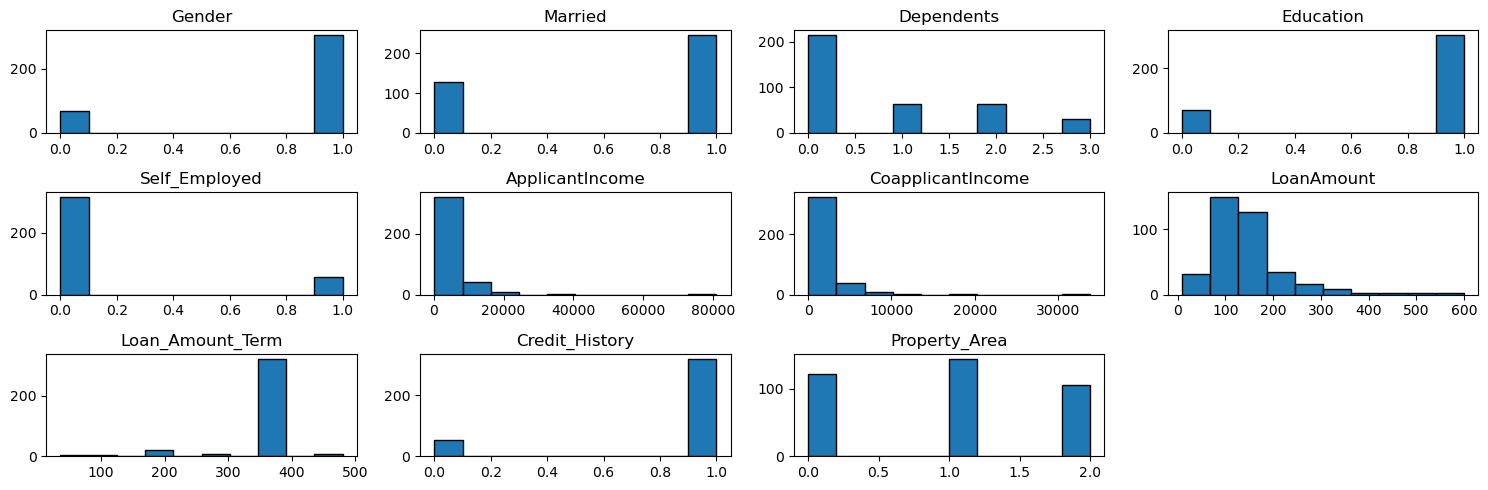

In [403]:
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import subplots

# Create subplots with 3 rows and 4 columns, with a figure size of (15, 5)
fig, axes = subplots(nrows=3, ncols=4, figsize=(15, 5))

# Initialize index for iterating over features
index = 0  
title = x.columns

for i in range(3):  # iterate over the rows
    for j in range(4):  # iterate over the columns
        if index < len(title):  # Ensure index does not exceed the number of features
            axes[i, j].hist(x.iloc[:, index], edgecolor='black')  # Plot histogram for the current feature
            axes[i, j].set_title(title[index])  # Set the title of the subplot using the column name of the feature
            index += 1  # Increment index to move to the next feature
        else:
            fig.delaxes(axes[i, j])  # Remove the extra subplots after the last feature

# Adjust the layout to avoid overlapping plots
pyplot.tight_layout()

# Show the plot
pyplot.show()


It appears that all features are grouped into different categories. It is not continous.

# A-2 Implementation

I used the implementation provided by the professor in the class(Discussion 5).
1. First function computes the Gini impurity. The Gini impurity is calculated as $ 1 - \Sigma (p_i)^2$ where $p_i$ is the probability of class i.

The Algorithm is as follows:
1. Start at the root node.
2. For each node, find a split that best seperates the data effectively. Evaluate all attributes and threshold values to find the split. Split the data based on maximimum information gain among all attributes. Information gain is difference between parent Gini impurity and weighted averages of the child Gini impurity after the split.
3. After finding the best attribute, store this information at the current node.
4. Repeat this process considering each child node as new rootnode with the remaining data.
5. Continue this process untill a stopping criteria is met. This criteria can be maximum depth, achieving minimum Gini impurity or having minimum number of samples in a node.
6. When the process is stopped, make that node as leaf node and save the most common class label from the data at that node.

In [407]:
def Gini_impurity(y):
    hist = np.bincount(y) #counts the occurrences of each class label
    ps = hist / len(y) # probability of each class
    return 1-np.sum([p * p for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None #returns True if the node is a leaf node


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split #Minimum number of samples required to split a node.
        self.max_depth = max_depth #Maximum depth of the tree.
        self.n_feats = n_feats #Number of features
        self.root = None

    #fit builds the decision tree by calling the _grow_tree()
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X]) #traverse the tree for each input feature to predict the output

    #This function recursively grows the tree by splitting the data
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)
    
    #find the feature which has highest information gain 
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh
    
    #calculate the information gain
    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = Gini_impurity(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = Gini_impurity(y[left_idxs]), Gini_impurity(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig
    
    #split the data
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    #find the most common label in the given list
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [408]:
#function for accuracy
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true) #no of correct predictions/ no of samples
    return accuracy

In [409]:
clf = DecisionTree(max_depth=4)
clf.fit(X_train, y_train) #trains the decision tree using the training data

y_pred = clf.predict(X_test) #use the trained decision tree for prediction of Validation data
acc = accuracy(y_test, y_pred) #calcuate the accuracy

print("Accuracy:", acc)

Accuracy: 0.84


I have computed the results of test data with the trained parameters. The results are written back to the mentioned csv file in the last columns

In [411]:
# Load the test data from the CSV file
TestData = pd.read_csv('data_test-1.csv')
print(TestData.shape)
# Drop rows with missing values
TestData_new = TestData.dropna()
# Extract the relevant features
Testx = TestData_new[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
          'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
          'Credit_History', 'Property_Area']].copy()

# Convert the string or character to number
Testx.loc[:, 'Gender'] = Testx['Gender'].map({'Male': 1, 'Female': 0})
Testx.loc[:, 'Married'] = Testx['Married'].map({'Yes': 1, 'No': 0})
Testx.loc[:, 'Education'] = Testx['Education'].map({'Graduate': 1, 'Not Graduate': 0})
Testx.loc[:, 'Self_Employed'] = Testx['Self_Employed'].map({'Yes': 1, 'No': 0})
Testx.loc[:, 'Property_Area'] = Testx['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2})
Testx.loc[:, 'Dependents'] = Testx['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
Testx_array = Testx.to_numpy()
TestDataPredictions = clf.predict(Testx_array)
TestDataPredictions = np.where(TestDataPredictions == 1, 'Y', 'N')
# Add the predictions to the TestData DataFrame as a new column 'pred_tree'
TestData.loc[TestData_new.index, 'pred_tree'] = TestDataPredictions
print(TestData.head())


(123, 15)
   Unnamed: 0   Loan_ID Gender Married Dependents     Education Self_Employed  \
0           0  LP002364   Male     Yes          0      Graduate            No   
1           1  LP001334   Male     Yes          0  Not Graduate            No   
2           2  LP002979   Male     Yes         3+      Graduate            No   
3           3  LP002443   Male     Yes          2      Graduate            No   
4           4  LP001758   Male     Yes          2      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            14880                0.0        96.0             360.0   
1             4188                0.0       115.0             180.0   
2             4106                0.0        40.0             180.0   
3             3340             1710.0       150.0             360.0   
4             6250             1695.0       210.0             360.0   

   Credit_History Property_Area pred_tree pred_xgboost  
0             1.0  

# Part B - Boosting

1. The function train_XGBoost performs bootstrapped training of an XGBoost model with L2 regularization to evaluate its performance for different regularization parameters (alpha_vals). 
2. It returns the average Area Under the Curve (AUC) for each alpha value across multiple bootstrap iterations.

   Reference for XGboost: https://xgboosting.com/

In [414]:
def train_XGBoost(n_bootstraps, alpha_vals, x_array, y):
    mean_auc = {alpha: 0 for alpha in alpha_vals} #dictionary to store the average AUC for each value of alpha
    aucs_xgboost = [0 for alpha in alpha_vals] #list that accumulates AUC values for each alpha

    #Bootstrap Loop
    for _ in range(n_bootstraps):
        rindex = np.random.choice(len(x_array), size=len(x_array), replace=True)
        X_train_b = x_array[rindex]
        y_train_b = y[rindex]
        oindex = np.array(list(set(range(len(x_array))) - set(rindex)))
        x_test_b = x_array[oindex]
        y_test_b = y[oindex]
        index = 0

        #Train and Evaluate XGBoost for Each Alpha
        for alpha in alpha_vals:
            xgbClassifierModel = XGBClassifier(objective='binary:logistic', reg_lambda=alpha, random_state=1234, max_depth=5)
            xgbClassifierModel.fit(X_train_b, y_train_b)
            y_predprob = xgbClassifierModel.predict_proba(x_test_b)[:,1]
            fpr, tpr, _ = roc_curve(y_test_b, y_predprob)
            # Calculate the area under the ROC curve (AUC)
            roc_auc = auc(fpr, tpr)
            aucs_xgboost[index] = aucs_xgboost[index] + roc_auc
            index = index + 1

    # Calculate the Mean AUC
    index = 0
    for alpha in alpha_vals:
        mean_auc[alpha] = aucs_xgboost[index]/n_bootstraps
        index = index + 1
    return mean_auc
    

In [415]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
data = pd.read_csv('data_train-1.csv')
data = data.dropna() #drop the rows where there are missing values

# Extract the attributes. Copy the mentioned columns from the 'data' to x. The copy() method returns a copy of the DataFrame
x = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
          'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
          'Credit_History', 'Property_Area']].copy()

# Extract the target. Copy the mentioned columns from the 'data' to y. The copy() method returns a copy of the DataFrame
y = data[['Loan_Status']].copy()

# Convert the string or character to number
x.loc[:, 'Gender'] = x['Gender'].map({'Male': 1, 'Female': 0}) #'Male' is mapped to 1, and 'Female' is mapped to 0
x.loc[:, 'Married'] = x['Married'].map({'Yes': 1, 'No': 0}) # 'Yes' is mapped to 1, and 'No' is mapped to 0
x.loc[:, 'Education'] = x['Education'].map({'Graduate': 1, 'Not Graduate': 0}) #'Graduate' is mapped to 1, and 'Not Graduate' is mapped to 0
x.loc[:, 'Self_Employed'] = x['Self_Employed'].map({'Yes': 1, 'No': 0}) #'Yes' is mapped to 1, and 'No' is mapped to 0
#'Urban' is mapped to 0, 'Semiurban' is mapped to 1, and 'Rural' is mapped to 2
x.loc[:, 'Property_Area'] = x['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2}) 
#'0' mapped to 0, '1' mapped to 1, '2' mapped to 2, and '3+' mapped to 3.
x.loc[:, 'Dependents'] = x['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3}) 

y = y['Loan_Status'].map({'Y': 1, 'N': 0}).to_numpy() #convert a dataframe to Numpy array

x_array = x.to_numpy()  #convert dataframe to Numpy array



n_bootstraps = 100
alpha_vals = [1e-3,1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
Avg_AUC = train_XGBoost(n_bootstraps, alpha_vals, x_array, y)
print(Avg_AUC)
optimal_alpha = max(Avg_AUC, key=Avg_AUC.get)
Max_AUC = Avg_AUC[optimal_alpha]
print("optimal alpha: ", optimal_alpha)
print("Maximum AUC", Max_AUC)


{0.001: 0.7125339368272221, 0.01: 0.7123658653515339, 0.1: 0.7118091518888906, 1: 0.7220324973956211, 10.0: 0.7236397233432413, 100.0: 0.7209963776823795, 1000.0: 0.7213578209675978}
optimal alpha:  10.0
Maximum AUC 0.7236397233432413


I used the results from the train_XGBoost function which is optimal alpha = 10 for futher training of model with the entire data.

Accuarcy:  0.7466666666666667


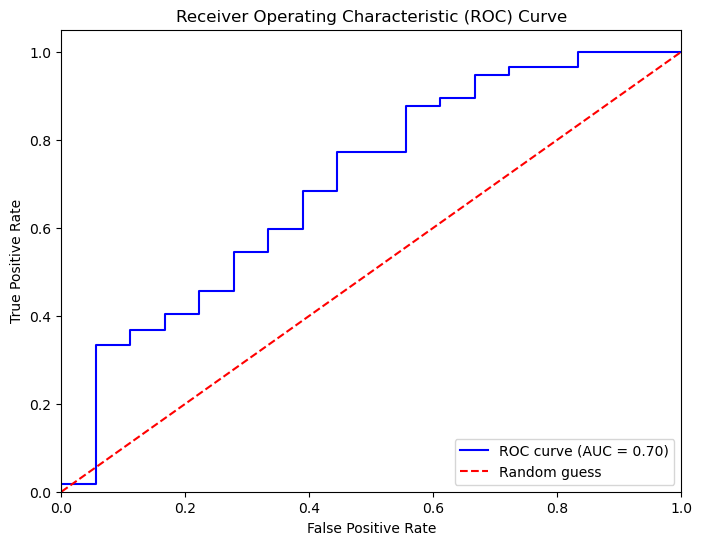

In [417]:
# split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.2, random_state=1234)

xgbClassifierModel = XGBClassifier(objective='binary:logistic', reg_lambda=optimal_alpha, random_state=1234, max_depth=5)
xgbClassifierModel.fit(X_train, y_train)
y_predprob = xgbClassifierModel.predict_proba(X_test)[:,1]
accuracy = xgbClassifierModel.score(X_test, y_test)
fpr, tpr, _ = roc_curve(y_test, y_predprob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
accuracy = xgbClassifierModel.score(X_test, y_test)
print('Accuarcy: ', accuracy)

# Plot the ROC curve
pyplot.figure(figsize=(8, 6))
pyplot.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
pyplot.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver Operating Characteristic (ROC) Curve')
pyplot.legend(loc="lower right")
pyplot.show()

It is observed that for XGboost technique, the accuarcy is 74.66% and Area under curve is 0.70. I have done multiple trails with different maximum depths. when the maximum depth is 4, the AUC is 0.68 and when the maximum depth is 5, the AUCis 0.70. If I increased it to 6, the AUC is reduced to 0.69. That's the reason I have given the max_depth as 5. I have used the hyperparameters resulted from train_XGBoost function

In [419]:
TestDataPredictions_boost = xgbClassifierModel.predict(Testx_array)
TestDataPredictions_boost = np.where(TestDataPredictions_boost == 1, 'Y', 'N')
# Add the predictions to the TestData DataFrame as a new column 'pred_tree'
TestData.loc[TestData_new.index, 'pred_xgboost'] = TestDataPredictions_boost
print(TestData.head())
TestData.to_csv('data_test-1.csv', index=False)

#This is implemented for submission of results
Results = pd.DataFrame({'pred_tree': TestDataPredictions, 'pred_xgboost': TestDataPredictions_boost})
Results.to_csv('SreedharReddy_Pacharla_preds.csv', index=False)

   Unnamed: 0   Loan_ID Gender Married Dependents     Education Self_Employed  \
0           0  LP002364   Male     Yes          0      Graduate            No   
1           1  LP001334   Male     Yes          0  Not Graduate            No   
2           2  LP002979   Male     Yes         3+      Graduate            No   
3           3  LP002443   Male     Yes          2      Graduate            No   
4           4  LP001758   Male     Yes          2      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            14880                0.0        96.0             360.0   
1             4188                0.0       115.0             180.0   
2             4106                0.0        40.0             180.0   
3             3340             1710.0       150.0             360.0   
4             6250             1695.0       210.0             360.0   

   Credit_History Property_Area pred_tree pred_xgboost  
0             1.0     Semiurb